<a href="https://colab.research.google.com/github/salianbharat/BE_DS_Assignment/blob/main/Obesity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**


## Problem Statement
This notebook aims to explore and analyze the obesity classification dataset using Decision Tree algorithms. The objective is to build predictive models that can classify individuals into different obesity categories based on various attributes such as age, gender, family history, and lifestyle factors. By leveraging decision tree techniques, we seek to extract meaningful insights from the data and develop accurate predictive models to aid in obesity classification.

## Dataset Overview
The obesity classification dataset contains information about individuals' attributes and their corresponding obesity levels, categorized into four classes: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, and Obesity Type I, II, and III. The dataset includes features such as age, gender, height, weight, family history of obesity, dietary habits, physical activity level, and other lifestyle factors.

## Approach
1. **Foundational Knowledge:** We'll start by understanding the principles of decision trees and familiarizing ourselves with decision tree algorithms.
2. **Data Exploration:** We'll analyze the dataset's structure and characteristics using various exploratory techniques such as histograms, scatter plots, and correlation matrices to gain insights into the dataset's attributes.
3. **Preprocessing and Feature Engineering:** We'll handle missing values, encode categorical variables, and split the dataset into training and testing sets.
4. **Decision Tree Construction:** We'll choose appropriate hyperparameters and implement decision tree algorithms to train the models on the training data.
5. **Model Evaluation:** We'll evaluate the trained models using metrics such as accuracy, precision, recall, and F1-score, and visualize the decision trees to interpret the learned decision rules and feature importance.
6. **Hyperparameter Tuning and Model Optimization:** We'll perform hyperparameter tuning and optimization to improve the model's performance using techniques like grid search or random search and validate the optimized model using cross-validation techniques.


Let's begin by importing the necessary libraries and loading the dataset.


**Importing requied libraries**

In [4]:

# Pandas: For data manipulation and analysis
import pandas as pd

# Matplotlib and Seaborn: For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: For building and evaluating decision tree models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
OC = pd.read_csv("/Obesity Classification.csv")


In [11]:
# Print the column names of the dataset
print("Column names of the dataset:")
print(OC.columns)


Column names of the dataset:
Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')


First few rows of the dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Shape of the dataset:
(108, 7)

Data types of each column:
ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

Summary statistics of numerical columns:
               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.70

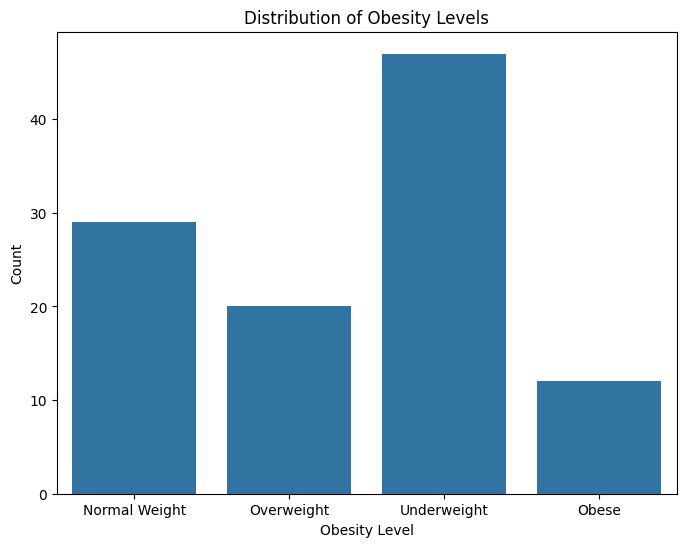

In [16]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(OC.head())

# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:")
print(OC.shape)

# Check the data types of each column
print("\nData types of each column:")
print(OC.dtypes)

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(OC.describe())

# Check for missing values
print("\nMissing values:")
print(OC.isnull().sum())

# Visualize the distribution of the target variable (obesity levels)
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=OC)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()




In [22]:
OC.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

Accuracy: 1.0


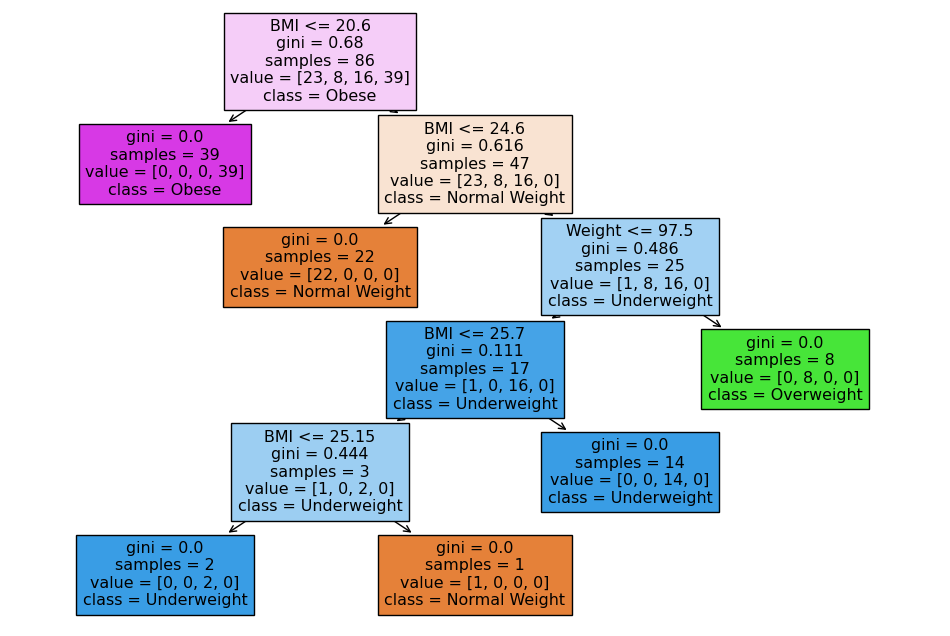

In [24]:
# Split the dataset into features (X) and target (y)
X = OC.drop(columns=['Label'])
y = OC['Label']

# Encode categorical variables if not already encoded
# We assume that the 'Gender' column needs encoding
if 'Gender' in X.columns:
    X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Construction
# Implement Decision Tree with default hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Model Evaluation
# Evaluate the model on the testing set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()




In [25]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Model Evaluation (with tuned hyperparameters)
# Evaluate the model on the testing set
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (after hyperparameter tuning):", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy (after hyperparameter tuning): 0.9090909090909091


In [26]:
# Model Evaluation (with tuned hyperparameters)
# Evaluate the model on the testing set using additional metrics
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      0.67      0.80         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.67      1.00      0.80         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.91        22
    macro avg       0.92      0.92      0.90        22
 weighted avg       0.94      0.91      0.91        22

Confusion Matrix:
[[4 0 2 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]


In [27]:
# Feature Importance
# Get feature importance from the tuned decision tree model
feature_importance = best_dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
       Feature  Importance
4          BMI    0.818286
3       Weight    0.181714
0           ID    0.000000
1          Age    0.000000
2       Height    0.000000
5  Gender_Male    0.000000


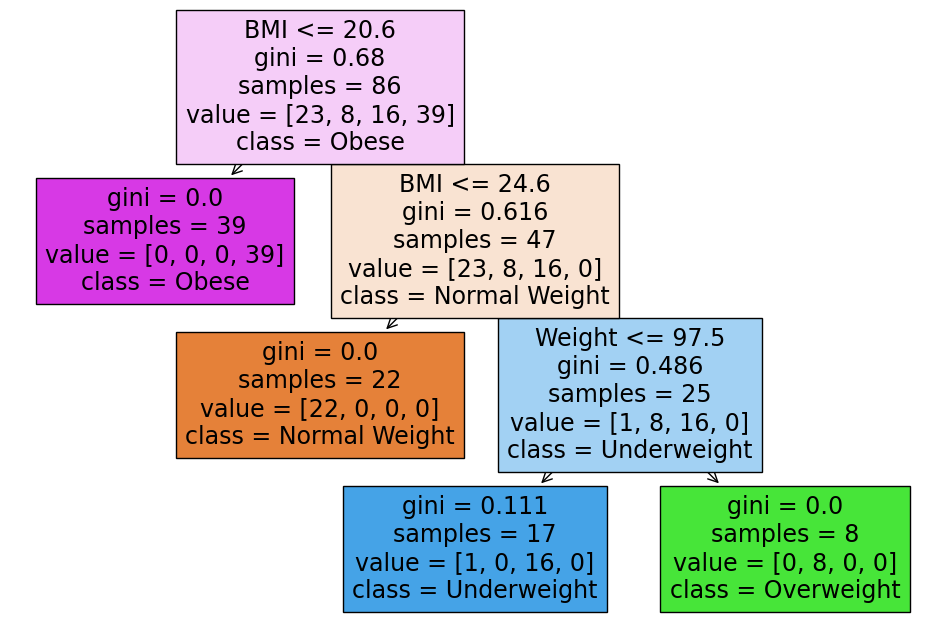

In [28]:
# Model Interpretation
# Visualize the decision tree to interpret decision rules and feature importance
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 1.0


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 1.0


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Evaluate Gradient Boosting model
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 1.0
